In [1]:
# Import Libraries and Load Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r"C:\Users\aksha\OneDrive\Desktop\Churn_Modelling.csv"
churn_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
# Define features and target variable
X = churn_data.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = churn_data["Exited"]

# Define categorical and numerical columns
categorical_cols = ["Geography", "Gender"]
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Remove target from numerical columns list if present
if "Exited" in numerical_cols:
    numerical_cols.remove("Exited")

# Preprocessing pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Display the shape of the preprocessed data
print(X_preprocessed.shape)


(10000, 11)


In [51]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Display the first few predictions
print(y_pred_prob[:10])


[0.04 0.03 0.15 0.2  0.08 0.01 0.09 0.31 0.29 0.27]


Text(158.22222222222223, 0.5, 'Actual')

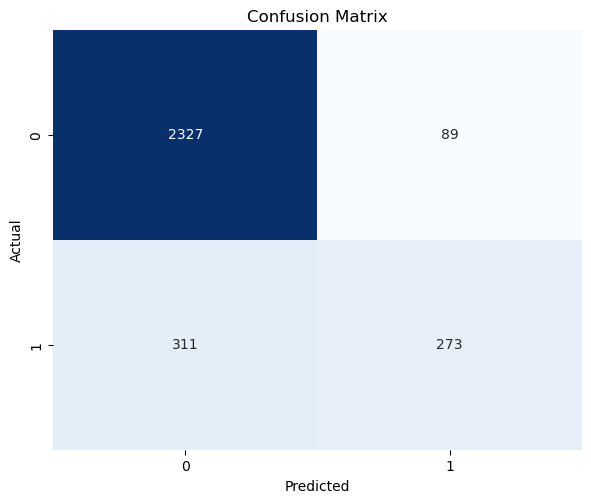

In [31]:
# Classification Report and Confusion Matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(15, 12))

# Confusion Matrix
plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")


Text(0.5, 1.0, 'Feature Importance')

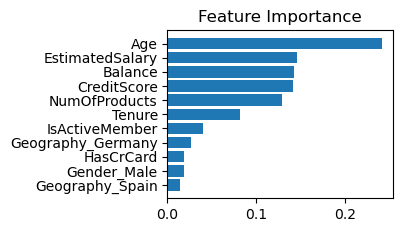

In [33]:
# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.subplot(2, 2, 2)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(numerical_cols + list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out()))[sorted_idx])
plt.title("Feature Importance")


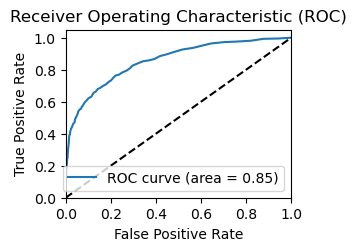

In [35]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")

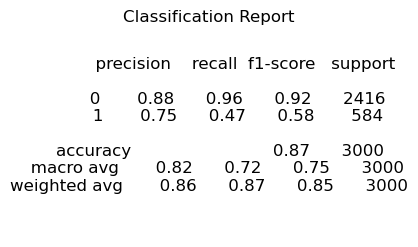

In [37]:
# Classification Report
plt.subplot(2, 2, 4)
plt.axis('off')
plt.text(0.5, 0.5, class_report, horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.title("Classification Report")

plt.tight_layout()
plt.show()
